<a href="https://colab.research.google.com/github/mjgpinheiro/Physics_models/blob/main/EconomicWave2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

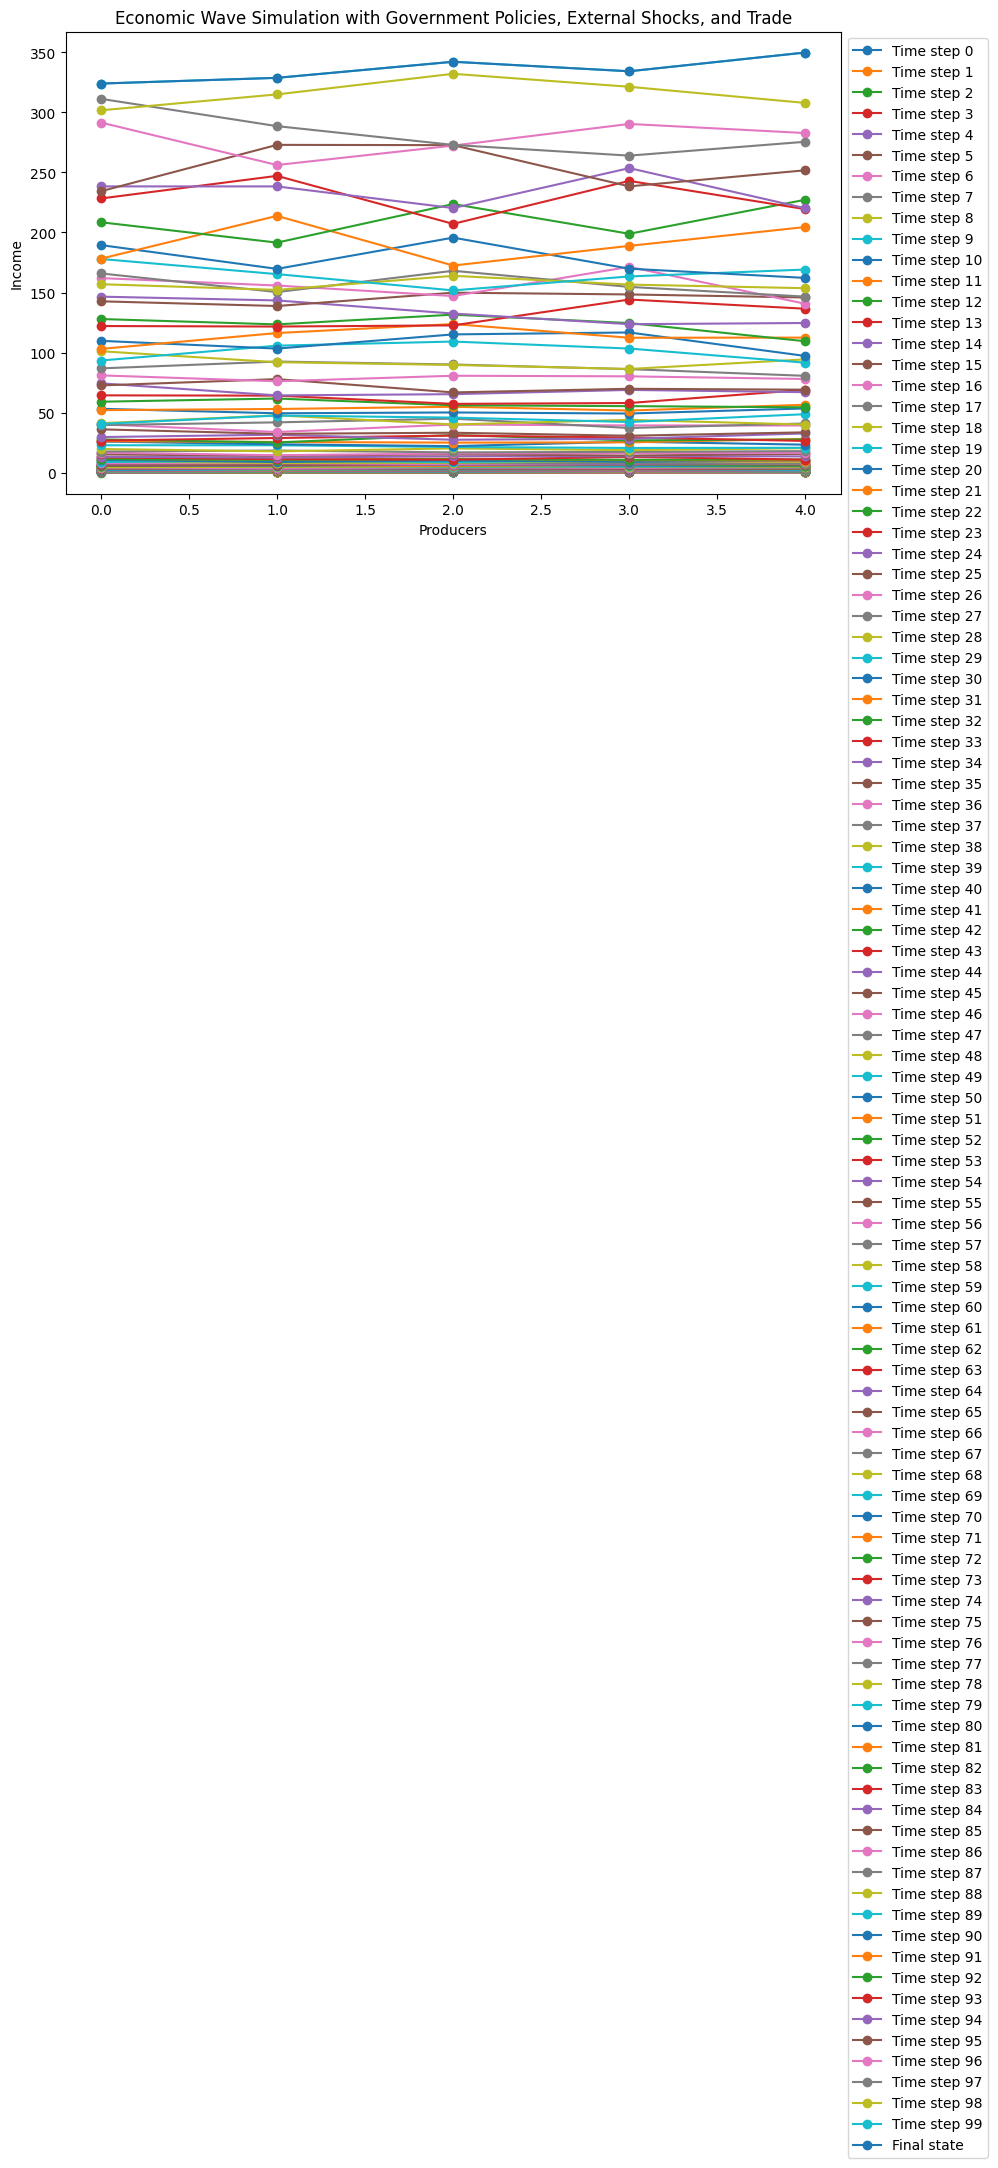

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Set the number of time steps and producers
n_timesteps = 100
n_producers = 5 #10

# Set the rates for the different variables
innovation_rate = 0.08  #0.3
demand_rate = 0.3
productivity_rate = 0.7
income_rate = 0.3

tax_rate = 0.25 #0.1
govt_spending_rate = 0.25

external_shock_probability = 0.1
external_shock_magnitude = 0.5

# Initialize the variables
innovation = np.random.rand(n_producers)
demand = np.random.rand(n_producers)
productivity = np.random.rand(n_producers)
income = np.random.rand(n_producers)

# Initialize the plot
plt.figure(figsize=(10, 6))

# Introduce a trade matrix
trade_matrix = np.random.rand(n_producers, n_producers)

# Normalize the trade matrix
trade_matrix = trade_matrix / np.sum(trade_matrix, axis=1)[:, np.newaxis]
#trade_matrix = trade_matrix / np.sum(trade_matrix, axis=1)[:, np.newaxis]

# Run the simulation
for t in range(n_timesteps):
    # Update the variables
    innovation += innovation_rate * np.random.randn(n_producers)
    demand += demand_rate * np.random.randn(n_producers)
    productivity += productivity_rate * np.random.randn(n_producers)

    # Calculate trade between producers
    trade = np.dot(trade_matrix, income)

    # Update income with trade and random fluctuations
    income = trade * (1 + income_rate * np.random.rand(n_producers))

    # Apply government policies
    income *= (1 - tax_rate)
    income += govt_spending_rate * np.sum(income) / n_producers

    # Apply external shocks
    if np.random.rand() < external_shock_probability:
        shock = np.random.choice([-1, 1]) * external_shock_magnitude * np.random.rand(n_producers)
        income += shock

    # Plot the current state of the system
    plt.plot(income, marker='o', linestyle='-', label=f'Time step {t}')

# Finalize the plot
plt.plot(income, marker='o', linestyle='-', label='Final state')

plt.xlabel('Producers')
plt.ylabel('Income')
plt.title('Economic Wave Simulation with Government Policies, External Shocks, and Trade')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

